In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import svm

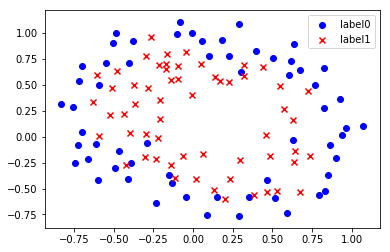

In [4]:
data = np.genfromtxt("./data/LR-testSet2.txt", delimiter=",")
x_data=data[:,:-1]
y_data=data[:,-1]
def plot():
    x0=[]
    x1=[]
    y0=[]
    y1=[]
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'])
plot()
plt.show()

In [5]:
model = svm.SVC(kernel='rbf')
model.fit(x_data,y_data)

C:\Users\张帅\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
model.score(x_data,y_data)

0.8050847457627118

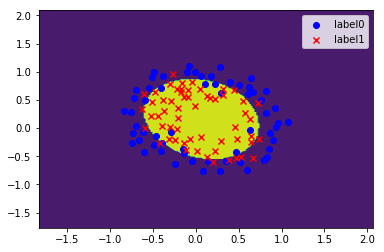

In [7]:
x_min,x_max=x_data[:,0].min()-1,x_data[:,0].max()+1
y_min,y_max=x_data[:,1].min()-1,x_data[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),
                 np.arange(y_min,y_max,0.02))
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
cs=plt.contourf(xx,yy,z)
plot()
plt.show()